<a href="https://colab.research.google.com/github/debajyoti-iitm/Basic-and-Machine-Learning-Programs-In-Python/blob/main/NIFTY500_companies_turnover_prediction_with_Keras_and_concepts_of_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we demonstrate the prediction of the next sequence using Deep Learning in Python.

The next sequence prediction means predicting the next value of a given input sequence.

For example, if the input sequence contains the values [0, 0.1, 0.2, 0.3] then the next predicted sequence should be [0.4].
To better understand this topic we’ll work on a real-life example which is the prediction of Stock prices. For this, we will use LSTM concepts.

We will work on NIFTY500 data from 28/07/2020 to 27/07/2021 which is available on [NSE](https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm). The project uses 365 days' data as NSE website does not allow downloading more data than that. It consists of “Date”, “Open”, “High”, “Low”, “Close”, “Shares Traded”, and “Turnover (Rs. Cr)”.

First import the following Python packages like Pandas, Numpy, Matplotlib, Keras, etc. 

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed,Input

Now, we read the data from the data file using pandas.

In [ ]:
df = pd.read_csv('nifty500.csv') #file data read
print(df[120:150]) #print first 50 lines of dataset 

            Date      Open  ...  Shares Traded  Turnover (Rs. Cr)
120  15-Jan-2021  12078.60  ...     3917209536           70925.19
121  18-Jan-2021  11943.65  ...     2837637732           68505.23
122  19-Jan-2021  11851.15  ...     2212472618           58850.48
123  20-Jan-2021  12002.10  ...     2407564639           62345.33
124  21-Jan-2021  12154.70  ...     2731312071           77392.53
125  22-Jan-2021  12020.30  ...     3039832960           80443.11
126  25-Jan-2021  11951.10  ...     2692961157           71357.07
127  27-Jan-2021  11744.30  ...     2600763378           68325.45
128  28-Jan-2021  11419.30  ...     2946474453           68536.56
129  29-Jan-2021  11549.85  ...     2755193206           81015.99
130  01-Feb-2021  11396.90  ...     3206044317           84261.66
131  02-Feb-2021  11921.70  ...     3115606209           93755.74
132  03-Feb-2021  12139.70  ...     3076713409           85394.64
133  04-Feb-2021  12184.65  ...     3399706152           86049.57
134  05-Fe

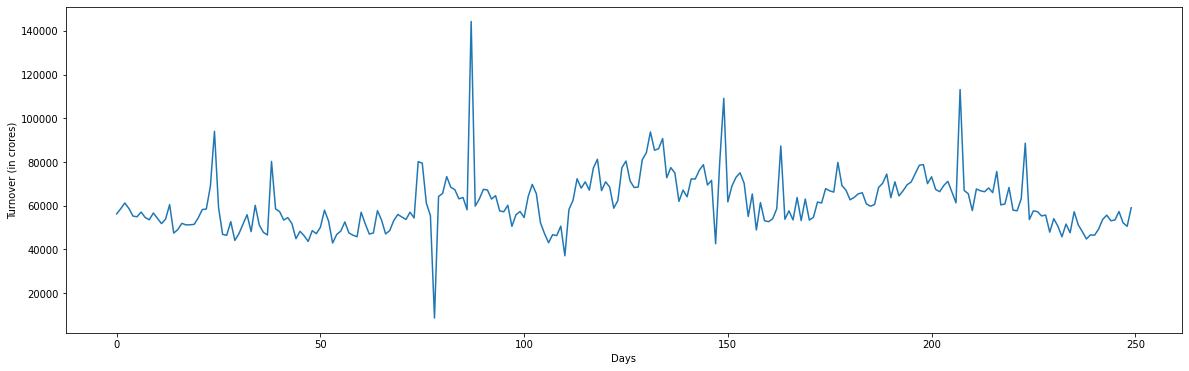

In [ ]:
#Now let us plot this data and see what happened in past one year
data = df.iloc[:,6].values #syntax is pandas.DataFrame.iloc[row, column]. So here we are printing all rows but only 6th column, i.e. turnover (in crores)
plt.figure(figsize=(20, 6)) #figure plotting etc 
plt.xlabel('Days')
plt.ylabel('Turnover (in crores)')
plt.plot(data)

We will use the turnover(in crores) data from 28th July 2020 to 25th February 2021 as train data and from 26th February 20 to 27th July 2021 as test data.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])  
mask = (df['Date'] == '2021-2-25')
print(df.loc[mask])     # index for the date 25th February 2021
print('--------------------------------------------')
train = data[:148]
test = data[149:]

          Date     Open     High  ...     Close  Shares Traded  Turnover (Rs. Cr)
148 2021-02-25  12543.5  12615.4  ...  12567.85     3273662422           79703.83

[1 rows x 7 columns]
--------------------------------------------


Now, we will normalize the train and test data using a min-max scaler.

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1)) #normalization of data between 0 to 1
train = sc.fit_transform(train.reshape(-1,1)) #fitting of training data 
test = sc.transform(test.reshape(-1,1)) #fitting of test data segment

We will take timesteps = 29, i.e, take the first 29 days of data as input to predict the turnover on the 30th day. Create X_train using 29 timesteps for each sample.

In [ ]:
X_train = []
y_train = []
for i in range(29, train.shape[0]):
    X_train.append(train[i-29:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_train)
print(y_train[:3])

(119, 29) (119,)
[[0.35115436 0.36861163 0.38791218 ... 0.28198144 0.27863011 0.32504521]
 [0.36861163 0.38791218 0.36918111 ... 0.27863011 0.32504521 0.2615498 ]
 [0.38791218 0.36918111 0.34366258 ... 0.32504521 0.2615498  0.2841014 ]
 ...
 [0.43123973 0.50587598 0.53517252 ... 0.4687082  0.49846267 0.51704152]
 [0.50587598 0.53517252 0.42953393 ... 0.49846267 0.51704152 0.44852237]
 [0.53517252 0.42953393 0.45920669 ... 0.51704152 0.44852237 0.46407548]]
[0.2615498  0.2841014  0.31608179]


In [ ]:
# Training LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
model = Sequential()
# LSTM layer
model.add(LSTM(16, input_shape=(X_train.shape[1], 1), activation='relu',kernel_initializer='lecun_uniform'))
#  Dense layer
model.add(Dense(8))
model.add(Dense(4))
model.add(Dense(2))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history=model.fit(X_train, y_train, epochs = 105, batch_size = 4)

Epoch 1/105
30/30 [==============================] - 2s 9ms/step - loss: 0.1375
Epoch 2/105
30/30 [==============================] - 0s 9ms/step - loss: 0.0222
Epoch 3/105
30/30 [==============================] - 0s 10ms/step - loss: 0.0133
Epoch 4/105
30/30 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 5/105
30/30 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 6/105
30/30 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 7/105
30/30 [==============================] - 0s 8ms/step - loss: 0.0109
Epoch 8/105
30/30 [==============================] - 0s 8ms/step - loss: 0.0177
Epoch 9/105
30/30 [==============================] - 0s 8ms/step - loss: 0.0163
Epoch 10/105
30/30 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 11/105
30/30 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 12/105
30/30 [==============================] - 0s 10ms/step - loss: 0.0062
Epoch 13/105
30/30 [===============

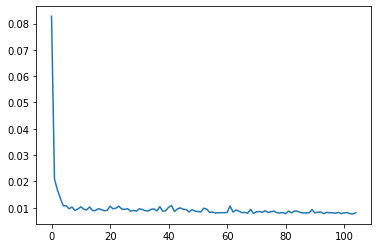

In [ ]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

In [ ]:
X_test = []
y_test = []
for i in range(30, test.shape[0]):
    X_test.append(test[i-30:i, 0])
    y_test.append(test[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)

(71, 30)
(119, 29, 1)


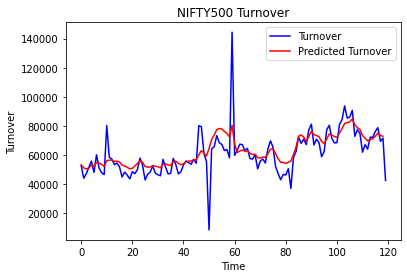

In [ ]:
predicted = model.predict(X_train)
predicted = sc.inverse_transform(predicted)
plt.plot(sc.inverse_transform(train[-120:]), color = 'blue', label = 'Turnover')
plt.plot(predicted, color = 'red', label = 'Predicted Turnover')
plt.title('NIFTY500 Turnover')
plt.xlabel('Time')
plt.ylabel('Turnover')
plt.legend()
plt.show()

In [28]:
#predicted = model.predict(X_test)
#predicted = sc.inverse_transform(predicted)
#plt.plot(sc.inverse_transform(test[-41:]), color = 'blue', label = 'Turnover')
#plt.plot(predicted, color = 'red', label = 'Predicted Turnover')
#plt.title('NIFTY500 Turnover')
#plt.xlabel('Time')
#plt.ylabel('Turnover')
#plt.legend()
#plt.show()